<a href="https://colab.research.google.com/github/Malhar-Girgaonkar/ArtClassification/blob/main/Art_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --upgrade pip
#!pip install --upgrade setuptools
#!pip install --upgrade wheel
#!pip install  opencv-python matplotlib
#!pip install tensorflow-gpu
#!pip install --upgrade wheel

In [1]:
#Import modules

import shutil
import os
import zipfile
import random
import shutil
import warnings

In [ ]:
#extract zip files it took me 8m 20s


# Replace 'path_to_zip_file' and 'extracted_folder' with your actual file and folder names
with zipfile.ZipFile('/content/drive/MyDrive/Art Classifier Dataset/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')

In [ ]:
#Code to delete dataset

folder_to_delete = '/content/extracted_folder'
shutil.rmtree(folder_to_delete)
try:
    os.listdir(folder_to_delete)
    print(f"The folder {folder_to_delete} was not deleted.")
except FileNotFoundError:
    print(f"The folder {folder_to_delete} has been successfully deleted.")

In [ ]:
#mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Creating directories and Setting dataset

In [ ]:

warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/Art Classifier Dataset/Datasets')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Art Classifier Dataset/Datasets"))
file_count = len(files)
#print(file_count)

In [ ]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/Art Classifier Dataset/Datasets'
base_dir = '/content/drive/MyDrive/Art Classifier Dataset/Dataused'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create 13 folders
# ['Western_Medieval', 'Renaissance', 'Rococo', 'Realism', 'Expressionism',
#'Japanese_Art', 'Symbolism', 'Neoclassicism', 'Primitivism', 'Romanticism',
# 'Academic_Art', 'Baroque', 'Art_Nouveau']

train_Academic_Art_dir = os.path.join(train_dir, 'Academic_Art')
os.mkdir(train_Academic_Art_dir)

train_Art_Nouveau_dir = os.path.join(train_dir, 'Art_Nouveau')
os.mkdir(train_Art_Nouveau_dir)

train_Baroque_dir = os.path.join(train_dir, 'Baroque')
os.mkdir(train_Baroque_dir)

train_Expressionism_dir = os.path.join(train_dir, 'Expressionism')
os.mkdir(train_Expressionism_dir)

train_Japanese_Art_dir = os.path.join(train_dir, 'Japanese_Art')
os.mkdir(train_Japanese_Art_dir)

train_Neoclassicism_dir = os.path.join(train_dir, 'Neoclassicism')
os.mkdir(train_Neoclassicism_dir)

train_Primitivism_dir = os.path.join(train_dir, 'Primitivism')
os.mkdir(train_Primitivism_dir)

train_Realism_dir = os.path.join(train_dir, 'Realism')
os.mkdir(train_Realism_dir)

train_Renaissance_dir = os.path.join(train_dir, 'Renaissance')
os.mkdir(train_Renaissance_dir)

train_Rococo_dir = os.path.join(train_dir, 'Rococo')
os.mkdir(train_Rococo_dir)

train_Romanticism_dir = os.path.join(train_dir, 'Romanticism')
os.mkdir(train_Romanticism_dir)

train_Symbolism_dir = os.path.join(train_dir, 'Symbolism')
os.mkdir(train_Symbolism_dir)

train_Western_Medieval_dir = os.path.join(train_dir, 'Western_Medieval')
os.mkdir(train_Western_Medieval_dir)

#Under validation folder create 13 folders
# ['Western_Medieval', 'Renaissance', 'Rococo', 'Realism', 'Expressionism',
#'Japanese_Art', 'Symbolism', 'Neoclassicism', 'Primitivism', 'Romanticism',
# 'Academic_Art', 'Baroque', 'Art_Nouveau']

validation_Academic_Art_dir = os.path.join(validation_dir, 'Academic_Art')
os.mkdir(validation_Academic_Art_dir)

validation_Art_Nouveau_dir = os.path.join(validation_dir, 'Art_Nouveau')
os.mkdir(validation_Art_Nouveau_dir)

validation_Baroque_dir = os.path.join(validation_dir, 'Baroque')
os.mkdir(validation_Baroque_dir)

validation_Expressionism_dir = os.path.join(validation_dir, 'Expressionism')
os.mkdir(validation_Expressionism_dir)

validation_Japanese_Art_dir = os.path.join(validation_dir, 'Japanese_Art')
os.mkdir(validation_Japanese_Art_dir)

validation_Neoclassicism_dir = os.path.join(validation_dir, 'Neoclassicism')
os.mkdir(validation_Neoclassicism_dir)

validation_Primitivism_dir = os.path.join(validation_dir, 'Primitivism')
os.mkdir(validation_Primitivism_dir)

validation_Realism_dir = os.path.join(validation_dir, 'Realism')
os.mkdir(validation_Realism_dir )

validation_Renaissance_dir = os.path.join(validation_dir, 'Renaissance')
os.mkdir(validation_Renaissance_dir)

validation_Rococo_dir = os.path.join(validation_dir, 'Rococo')
os.mkdir(validation_Rococo_dir)

train_Romanticism_dir = os.path.join(validation_dir, 'Romanticism')
os.mkdir(train_Romanticism_dir)

train_Symbolism_dir = os.path.join(validation_dir, 'Symbolism')
os.mkdir(train_Symbolism_dir)

train_Western_Medieval_dir = os.path.join(validation_dir, 'Western_Medieval')
os.mkdir(train_Western_Medieval_dir)


In [ ]:
#Spliting dataset into training testing validation

def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        shutil.copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        shutil.copyfile(this_file, destination)

In [ ]:
#List directories to be used in spliting

Academic_Art_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Academic_Art/'
TRAINING_Academic_Art_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Academic_Art/'
VALID_Academic_Art_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Academic_Art/'

Art_Nouveau_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Art_Nouveau/'
TRAINING_Art_Nouveau_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Art_Nouveau/'
VALID_Art_Nouveau_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Art_Nouveau/'

Baroque_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Baroque/'
TRAINING_Baroque_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Baroque/'
VALID_Baroque_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Baroque/'

Expressionism_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Expressionism/'
TRAINING_Expressionism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Expressionism/'
VALID_Expressionism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Expressionism/'

Japanese_Art_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Japanese_Art/'
TRAINING_Japanese_Art_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Japanese_Art/'
VALID_Japanese_Art_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Japanese_Art/'

Neoclassicism_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Neoclassicism/'
TRAINING_Neoclassicism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Neoclassicism/'
VALID_Neoclassicism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Neoclassicism/'

Primitivism_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Primitivism/'
TRAINING_Primitivism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Primitivism/'
VALID_Primitivism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Primitivism/'

Realism_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Realism/'
TRAINING_Realism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Realism/'
VALID_Realism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Realism/'

Renaissance_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Renaissance/'
TRAINING_Renaissance_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Renaissance/'
VALID_Renaissance_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Renaissance/'

Rococo_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Rococo/'
TRAINING_Rococo_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Rococo/'
VALID_Rococo_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Rococo/'

Romanticism_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Romanticism/'
TRAINING_Romanticism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Romanticism/'
VALID_Romanticism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Romanticism/'

Symbolism_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Symbolism/'
TRAINING_Symbolism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Symbolism/'
VALID_Symbolism_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Symbolism/'

Western_Medieval_SOURCE_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Datasets/Western_Medieval/'
TRAINING_Western_Medieval_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/Western_Medieval/'
VALID_Western_Medieval_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/Western_Medieval/'


In [ ]:
#Seting split of 80,20 for training,validation of size 21.6gb,5.4gb approx
#it took me 48m 1s to run this script

split_size = .85

split_data(Academic_Art_SOURCE_DIR, TRAINING_Academic_Art_DIR, VALID_Academic_Art_DIR , split_size)

split_data(Art_Nouveau_SOURCE_DIR, TRAINING_Art_Nouveau_DIR, VALID_Art_Nouveau_DIR , split_size)

split_data(Baroque_SOURCE_DIR, TRAINING_Baroque_DIR, VALID_Baroque_DIR , split_size)

split_data(Expressionism_SOURCE_DIR, TRAINING_Expressionism_DIR, VALID_Expressionism_DIR , split_size)

split_data(Japanese_Art_SOURCE_DIR, TRAINING_Japanese_Art_DIR, VALID_Japanese_Art_DIR , split_size)

split_data(Neoclassicism_SOURCE_DIR, TRAINING_Neoclassicism_DIR, VALID_Neoclassicism_DIR , split_size)

split_data(Primitivism_SOURCE_DIR, TRAINING_Primitivism_DIR, VALID_Primitivism_DIR , split_size)

split_data(Realism_SOURCE_DIR, TRAINING_Realism_DIR, VALID_Realism_DIR , split_size)

split_data(Renaissance_SOURCE_DIR, TRAINING_Renaissance_DIR, VALID_Renaissance_DIR , split_size)

split_data(Rococo_SOURCE_DIR, TRAINING_Rococo_DIR, VALID_Rococo_DIR , split_size)

split_data(Romanticism_SOURCE_DIR, TRAINING_Romanticism_DIR, VALID_Romanticism_DIR , split_size)

split_data(Symbolism_SOURCE_DIR, TRAINING_Symbolism_DIR, VALID_Symbolism_DIR , split_size)

split_data(Western_Medieval_SOURCE_DIR, TRAINING_Western_Medieval_DIR, VALID_Western_Medieval_DIR , split_size)

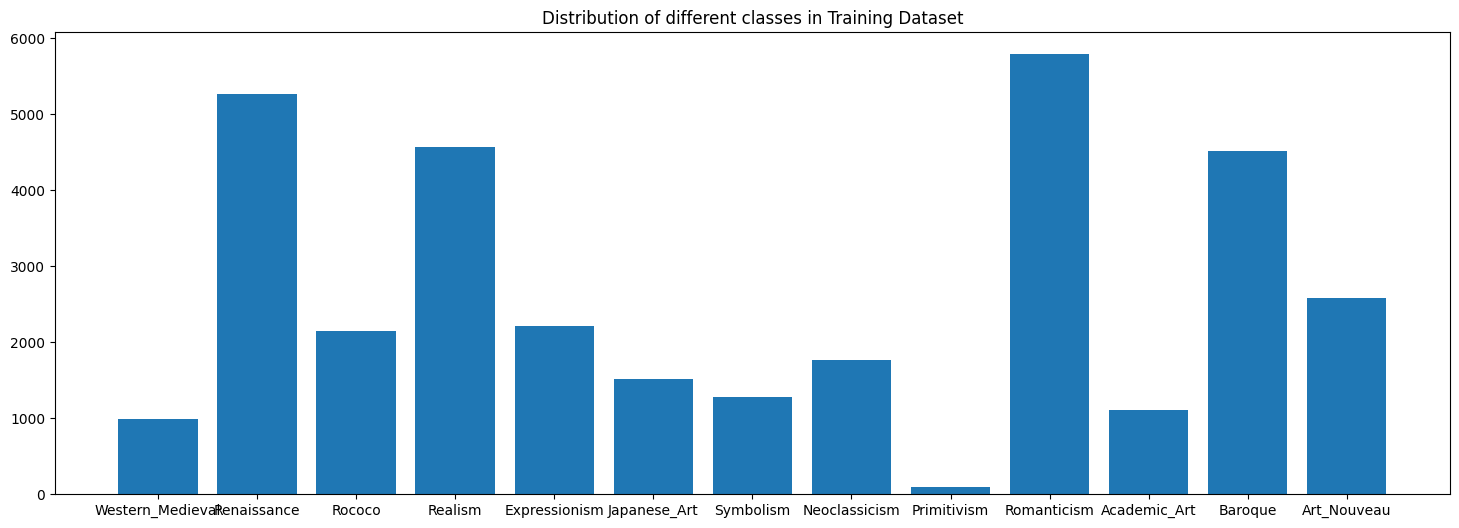




Training Western_Medieval images are: 984
Training Renaissance images are: 5264
Training Rococo images are: 2142
Training Realism images are: 4568
Training Expressionism images are: 2215
Training Japanese_Art images are: 1517
Training Symbolism images are: 1283
Training Neoclassicism images are: 1762
Training Primitivism images are: 99
Training Romanticism images are: 5791
Training Academic_Art images are: 1109
Training Baroque images are: 4515
Training Art_Nouveau images are: 2579


In [16]:
#Looking at data in training part
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Western_Medieval', 'Renaissance', 'Rococo', 'Realism', 'Expressionism', 'Japanese_Art', 'Symbolism', 'Neoclassicism', 'Primitivism', 'Romanticism', 'Academic_Art', 'Baroque', 'Art_Nouveau']

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()
print("\n\n")
#print no of images in each category
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/'+i+'/'))))

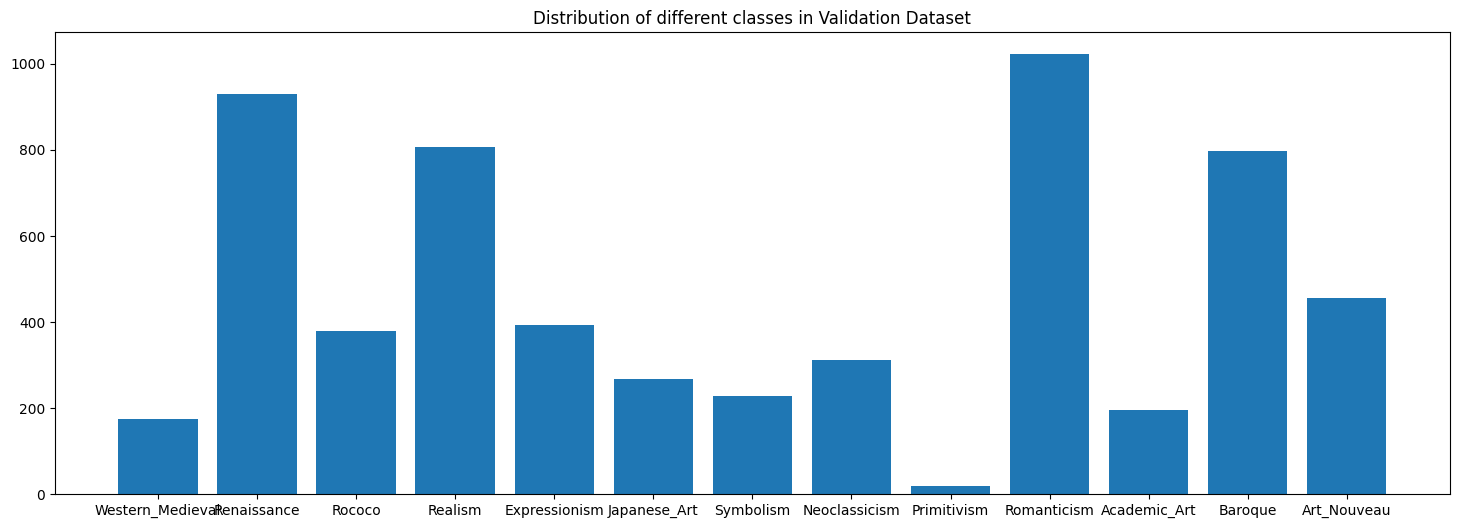




Testing Western_Medieval images are: 174
Testing Renaissance images are: 929
Testing Rococo images are: 379
Testing Realism images are: 807
Testing Expressionism images are: 392
Testing Japanese_Art images are: 268
Testing Symbolism images are: 227
Testing Neoclassicism images are: 312
Testing Primitivism images are: 18
Testing Romanticism images are: 1022
Testing Academic_Art images are: 196
Testing Baroque images are: 797
Testing Art_Nouveau images are: 456


In [17]:
#Looking data in validation part
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()
print("\n\n")
#print no of images in each category
for i in image_folder:
    print('Testing {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/'+i+'/'))))

Removing Dodgy Images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'Your_Data_Path'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Deep Learning Section

In [3]:
#import deep learning based modules
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
#Check if gpu is allocated
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

1

In [14]:
#Limit gpu usage to reasonable level and avoid OOM errors

# List available physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

# Set memory growth for each GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
#Setting image height and width and batch size
img_width=256; img_height=256
batch_size=512

In [12]:
#set training directory path and create a pipeline as datagen
TRAINING_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width)
                                                    )

Found 33828 images belonging to 13 classes.


In [13]:
#Set validation directory path and pipeline
VALIDATION_DIR = '/content/drive/MyDrive/Art Classifier Dataset/Dataused/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 5977 images belonging to 13 classes.


In [18]:
#Preventing overfitting using Earlystopping and saving best model using ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model in location :
best_model_file = '/content/drive/MyDrive/Art Classifier Dataset/Best_Models/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [19]:
#********************Convulation Neural Network Training starts here********************
#CNN structure NOTE:last dense layer value must match number of classes,ie=13
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(13, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 58, 58, 64)       

In [20]:
#Compiling model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
#This part is actually training of model and takes long time consider before running
#here we start with moderate epoch of 50 or 100
history = model.fit(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [early_stopping,best_model]
                              )